In [47]:
##SEGNALE IN FUNZIONE DELLA FREQUENZA ALL'ORARIO INDICATO##
import numpy as np
import pandas as pd
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import datetime

In [48]:
##conversione da dBm a Watt##
def Watt (x):
    watt = 10**((x - 30) / 10)
    return watt

In [63]:
def moving_average(data_set, periods=7):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

In [49]:
##CONVERSIONE DATA-ORA##
def converti (filename):
    YY = filename[-22:-20]
    mm = filename[-20:-18]
    dd = filename[-18:-16]
        
    HH = filename[-15:-13]
    MM = filename[-13:-11]
    SS = filename[-11:-9]
    f = "000000"
        
    date_time_string = "20" + YY + "-" + mm + "-" + dd + " " + HH + ":" + MM + ":" + SS + "." + f
    date_time_obj = datetime.datetime.strptime(date_time_string, '%Y-%m-%d %H:%M:%S.%f')
    
    return date_time_obj

In [50]:
##DIRECTORY CON I FILE DEL RICEVITORE DIGITALE DA ANALIZZARE##
path = input("directory: ") #../../"mese"/"giorno"
all_files = glob.glob(path + "/*.txt")
####

directory: ../../gennaio/28


In [51]:
##data
date = (input("inserire data (yyyy-mm-dd): "))

inserire data (yyyy-mm-dd): 2021-01-28


In [68]:
##orario a cui mostrare lo spettro 
hour = (input("inserire orario del picco (HH:MM:SS): "))

inserire orario del picco (HH:MM:SS): 09:45:00


In [69]:
f = "000000"
picco_string = date + " " + hour + "." + f
picco_obj = datetime.datetime.strptime(picco_string, '%Y-%m-%d %H:%M:%S.%f')

In [70]:
#vettori
freq = []
signal = []

In [71]:
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, sep = ';')
    print(filename)
    date_time_obj = converti(filename)
    if (date_time_obj < picco_obj < date_time_obj + datetime.timedelta(seconds = 300)):
        
        freq_start = float(df.iloc[1, 1].replace(",", "."))
        step = float(df.iloc[1, 2].replace(",", "."))
  
        for i in range(3, 8195):
            power = 0
            index = i - 3
            for j in range(0, len(df[0])): 
                dBm = float(df.iloc[j, i].replace(",", "."))
                mW = Watt(dBm) * 1000
                power = power + mW
            power = power/(len(df[0]) + 1)
            signal.append(power)
            freq.append(freq_start + index * step)
                
        break


../../gennaio/28/210128_112444_USRP.txt
../../gennaio/28/210128_092540_USRP.txt
../../gennaio/28/210128_094202_USRP.txt


In [56]:
print(len(signal))

8192


In [72]:
mean_signal = moving_average(signal, 7)
mean_freq = moving_average(freq, 7)

<IPython.core.display.Javascript object>


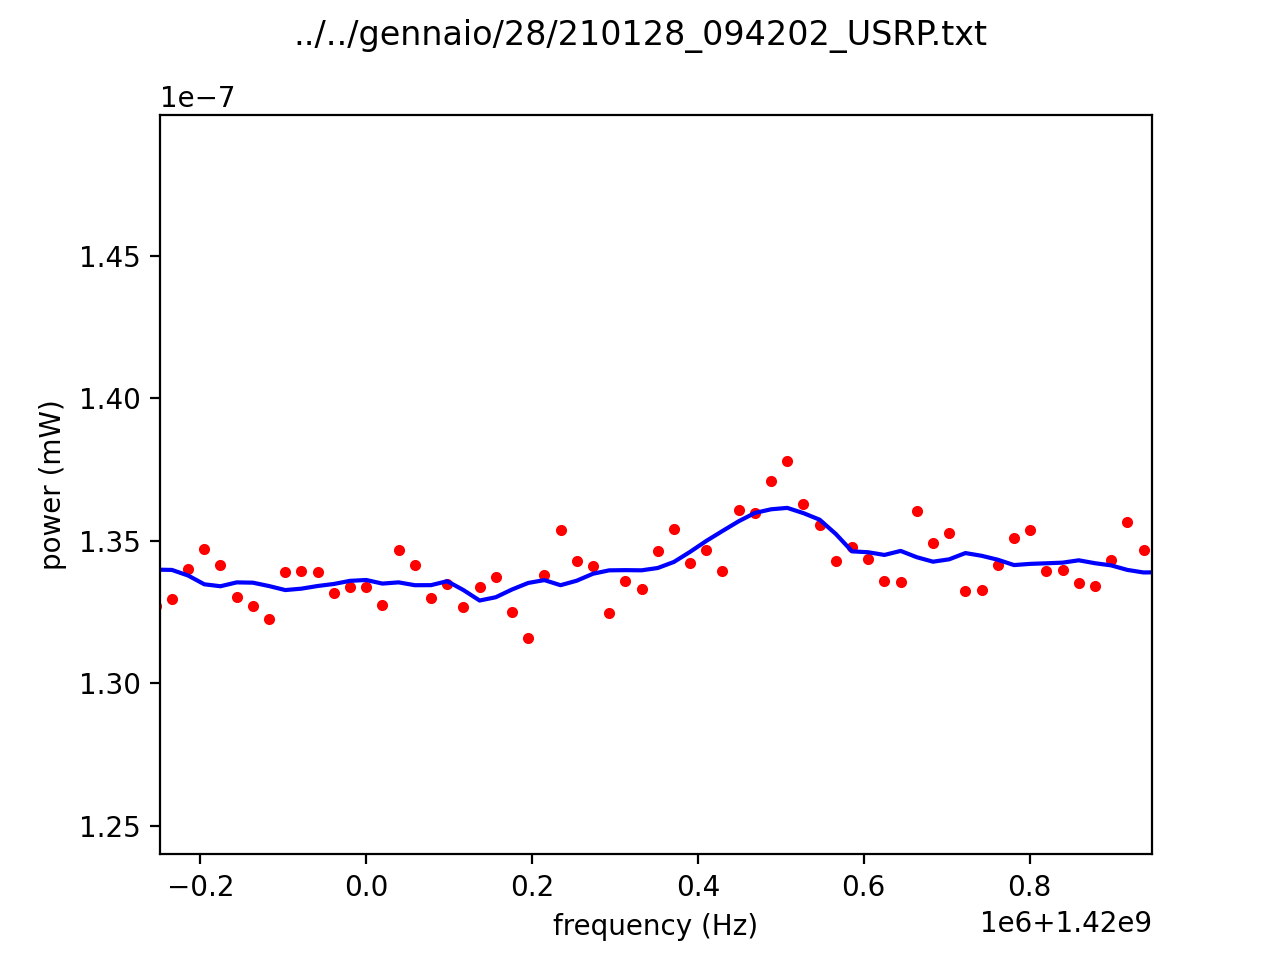

In [73]:
plt.plot(freq, signal, 'r.')
plt.plot(mean_freq, mean_signal, 'b-')
plt.xlabel('frequency (Hz)')
plt.ylabel('power (mW)')
plt.suptitle(filename)
plt.show()
